# Segment Anything Model for Geospatial Data

[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeos/segment-geospatial/blob/main/docs/examples/satellite.ipynb)
[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/segment-geospatial/blob/main/docs/examples/satellite.ipynb)

This notebook shows how to use segment satellite imagery using the Segment Anything Model (SAM) with a few lines of code.

Make sure you use GPU runtime for this notebook. For Google Colab, go to `Runtime` -> `Change runtime type` and select `GPU` as the hardware accelerator.

## Install dependencies

Uncomment and run the following cell to install the required dependencies.


In [1]:
# %pip install segment-geospatial

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014

## Import libraries

In [1]:
import os
import leafmap
from samgeo import SamGeo, tms_to_geotiff, get_basemaps

## Create an interactive map

In [ ]:
m = leafmap.Map(center=[29.676840, -95.369222], zoom=19)
m.add_basemap("SATELLITE")
m

Pan and zoom the map to select the area of interest. Use the draw tools to draw a polygon or rectangle on the map

In [ ]:
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()
else:
    bbox = [-95.3704, 29.6762, -95.368, 29.6775]

## Download map tiles

Download maps tiles and mosaic them into a single GeoTIFF file

In [2]:
# image = "satellite.tif"

Besides the `satellite` basemap, you can use any of the following basemaps returned by the `get_basemaps()` function:

In [ ]:
# get_basemaps().keys()

Specify the basemap as the source.

In [4]:
# tms_to_geotiff(output=image, bbox=bbox, zoom=20, source="Satellite", overwrite=True)

You can also use your own image. Uncomment and run the following cell to use your own image.

In [13]:
image = '/content/sample_data/PV03_341499_1188288.bmp'

Display the downloaded image on the map.

In [ ]:
# m.layers[-1].visible = False  # turn off the basemap
# m.add_raster(image, layer_name="Image")
# m

![](https://i.imgur.com/KAm84IY.png)

## Initialize SAM class

In [14]:
sam = SamGeo(
    model_type="vit_h",
    checkpoint="sam_vit_h_4b8939.pth",
    sam_kwargs=None,
)

## Segment the image

Set `batch=True` to segment the image in batches. This is useful for large images that cannot fit in memory.

In [15]:
mask = "segment.tif"
sam.generate(
    image, mask, batch=True, foreground=True, erosion_kernel=(3, 3), mask_multiplier=255
)

100%|██████████| 9/9 [01:08<00:00,  7.64s/it]


## Polygonize the raster data

Save the segmentation results as a GeoPackage file.

In [8]:
# vector = "segment.gpkg"
# sam.tiff_to_gpkg(mask, vector, simplify_tolerance=None)

You can also save the segmentation results as any vector data format supported by GeoPandas.

In [9]:
# shapefile = "segment.shp"
# sam.tiff_to_vector(mask, shapefile)

## Visualize the results


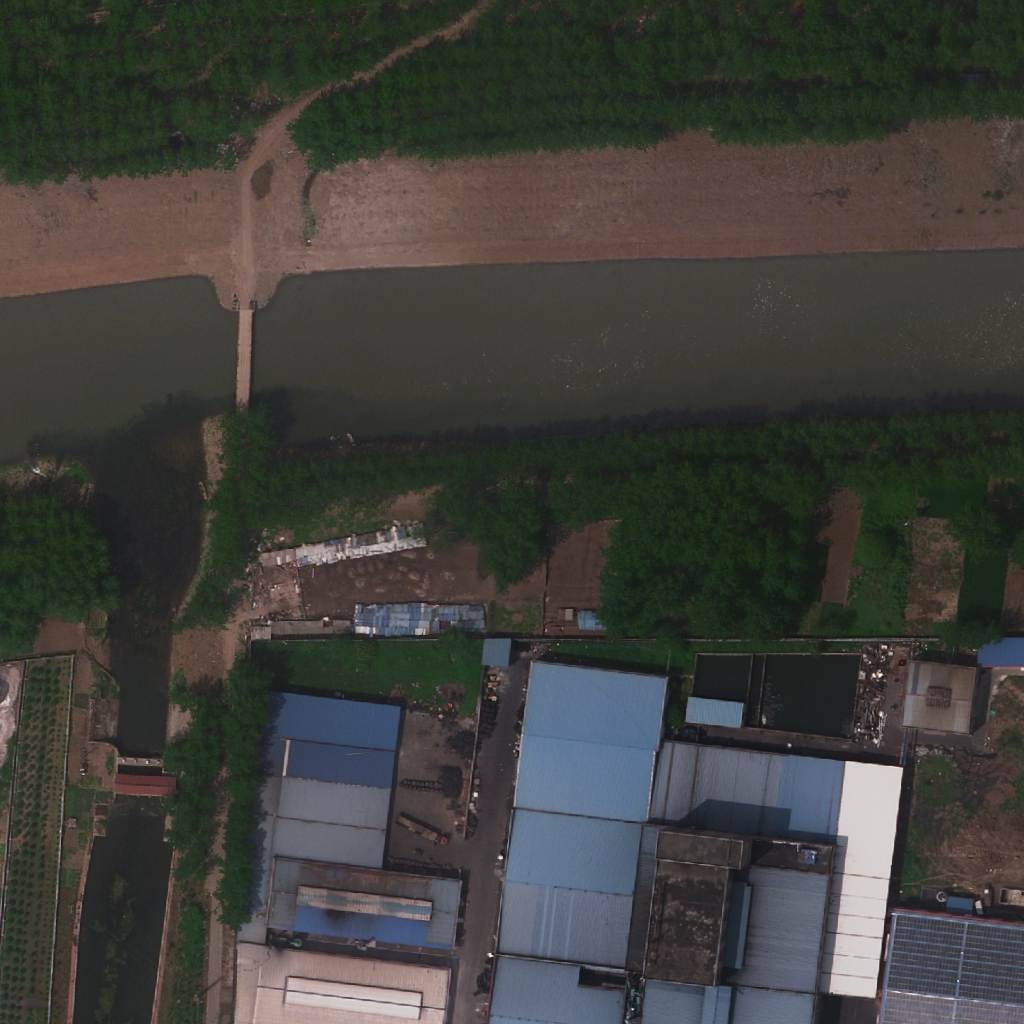
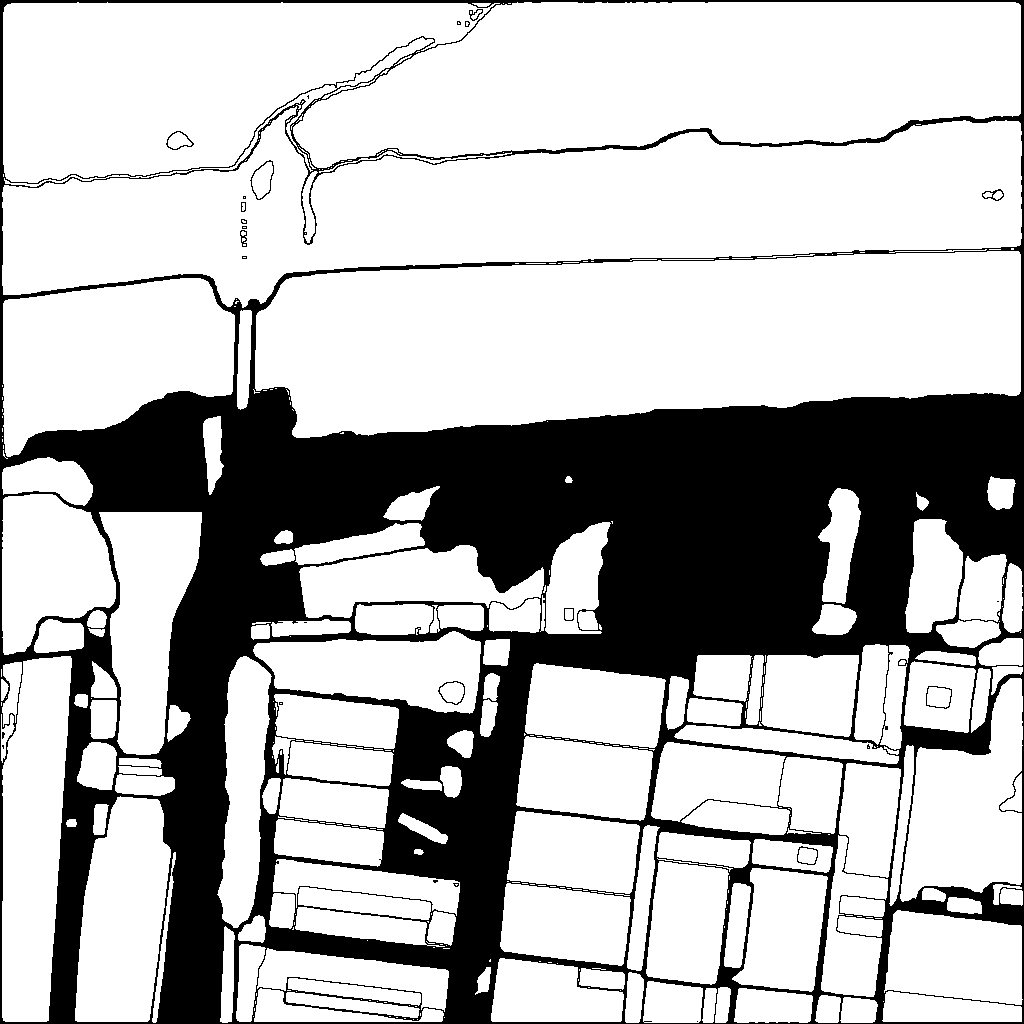

In [16]:
leafmap.image_comparison(
    image,
    "segment.tif",
    label1="Image",
    label2="Image Segmentation",
)

![](https://i.imgur.com/Ysq3u7E.png)